In [87]:
import pandas as pd
import seaborn as sns                      
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

data = pd.read_excel("/Users/chiaralu/Downloads/songs_en_fr_sp.xlsx")

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                824 non-null    object 
 1   name              824 non-null    object 
 2   artist            824 non-null    object 
 3   disc              824 non-null    int64  
 4   duration          824 non-null    int64  
 5   episode           824 non-null    bool   
 6   explicit          824 non-null    bool   
 7   popularity        824 non-null    int64  
 8   danceability      824 non-null    float64
 9   acousticness      824 non-null    float64
 10  energy            824 non-null    float64
 11  instrumentalness  824 non-null    float64
 12  liveness          824 non-null    float64
 13  loudness          824 non-null    float64
 14  mode              824 non-null    int64  
 15  speechiness       824 non-null    float64
 16  tempo             824 non-null    float64
 1

In [89]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (data.describe())

             disc      duration  popularity  danceability  acousticness  \
count  824.000000  8.240000e+02  824.000000    824.000000    824.000000   
mean     1.024272  2.301076e+05   42.819175      0.549507      0.463736   
std      0.224595  8.651620e+04   32.377708      0.164149      0.367729   
min      1.000000  7.940000e+04    0.000000      0.000000      0.000008   
25%      1.000000  1.785630e+05    0.000000      0.440750      0.075025   
50%      1.000000  2.118860e+05   51.000000      0.554000      0.458000   
75%      1.000000  2.582595e+05   72.000000      0.670000      0.840000   
max      4.000000  1.121253e+06   97.000000      0.951000      0.995000   

           energy  instrumentalness    liveness    loudness        mode  \
count  824.000000        824.000000  824.000000  824.000000  824.000000   
mean     0.495011          0.090610    0.173146   -9.916697    0.658981   
std      0.269483          0.229081    0.141704    4.975693    0.474340   
min      0.006770       

In [90]:
#Remove duplicates

duplicates = data[data.duplicated(keep='first')]
print("Duplicate rows:")
print(duplicates)
data[data.duplicated()].shape

Duplicate rows:
                         id                                       name  \
147  1fXiYSWmkKJfRKMegCkI11                                I Will Wait   
167  1hA4856JVAa0qqgKg6olJf  The Messenger - Live from Las Vegas, 2011   
168  0GgN4MhR5GKn5IcKN0e0rG                                     Cancer   
169  10nyNJ6zNy2YVYLrcwLccB                               No Surprises   
170  7lRlq939cDG4SzWOF4VAnd                   I'm Not Okay (I Promise)   
171  5u2FOoFhp495GIj5BJC77J                           Hold On Till May   
172  73CKjW3vsUXRpy3NnX4H7F                         Fake Plastic Trees   
173  7hFmiFUYmIjELj5d0UjbVh                How to Disappear Completely   
174  5k7VKj1Xwy5DjO4B0PdAOb                                       Nude   
175  1r8qywTSOGQvFxQnzcyiBj       One More Light - One More Light Live   
176  28kOpVf1aCgL0LSFfuKV4w                              Oom Sha La La   
177  2RTLIQRc8yogHh08waQDVa                           I Know It's Over   
178  6fTX2poT39Ucz6A7T

(30, 22)

In [92]:
# Remove duplicates and keep the first occurrence
data_no_duplicates = data.drop_duplicates(keep='first')

# Reset the index
data_no_duplicates = data_no_duplicates.reset_index(drop=True)

data = data_no_duplicates

In [93]:
# Iterate through each column and check if it has only one unique value
unary_columns = []
for column in data.columns:
    unique_values = data[column].nunique()
    if unique_values == 1:
        unary_columns.append(column)

if unary_columns:
    print("Unary columns found:", unary_columns)
else:
    print("No unary columns found in the dataset.")

Unary columns found: ['episode']


In [94]:
#drop column 'episode'
data = data.drop(unary_columns, axis=1)

In [95]:
#Check for null values
print(data.isnull().sum())
#No Null cells

id                  0
name                0
artist              0
disc                0
duration            0
explicit            0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
language            0
Polarity            0
Subjectivity        0
dtype: int64


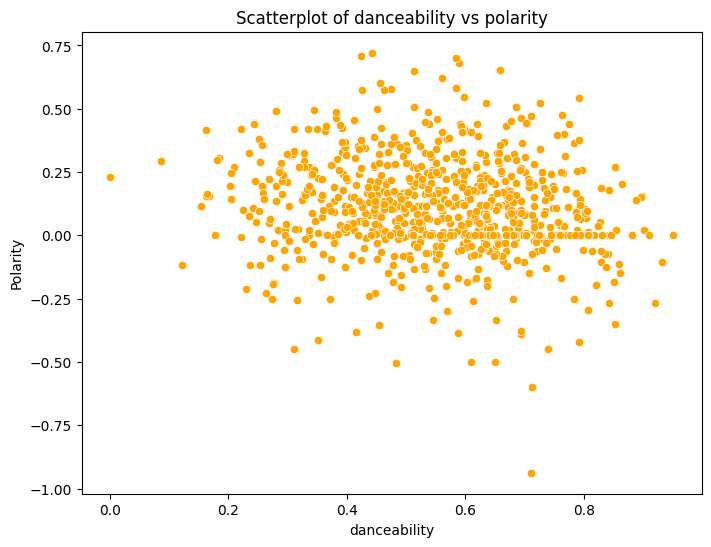

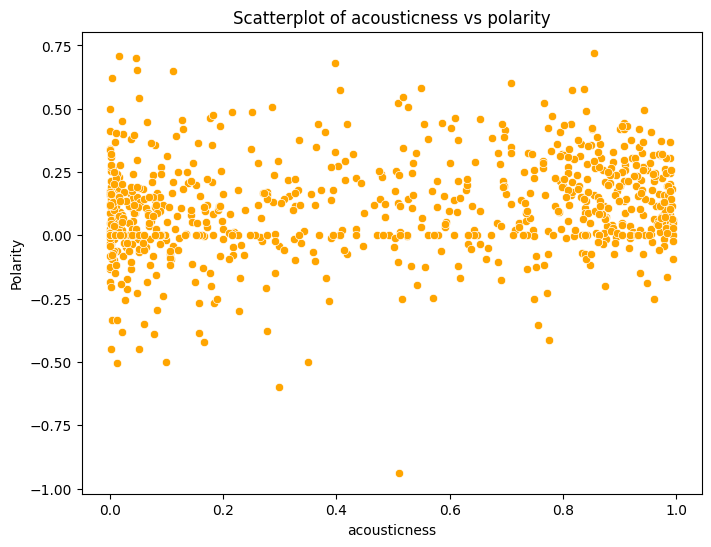

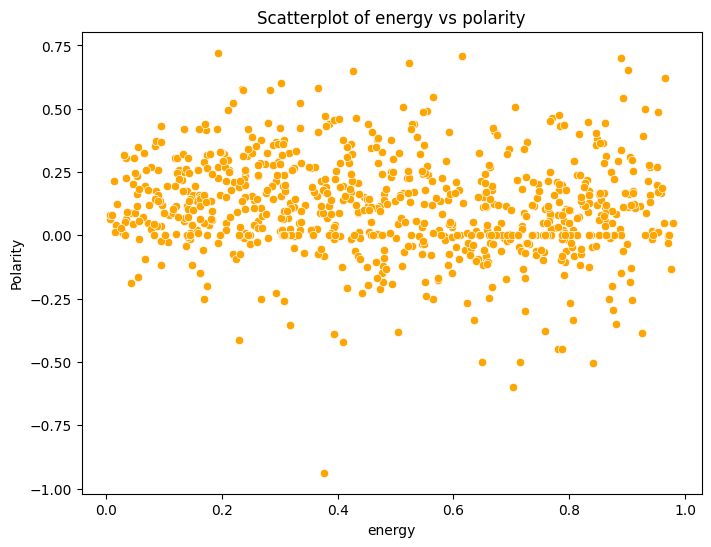

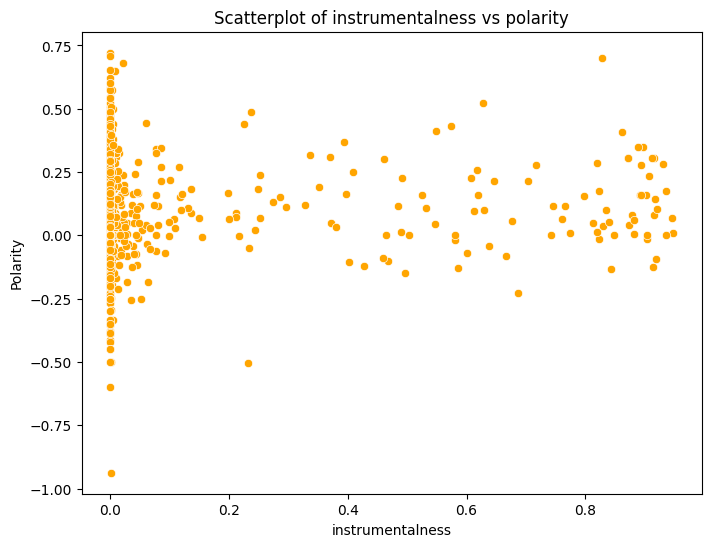

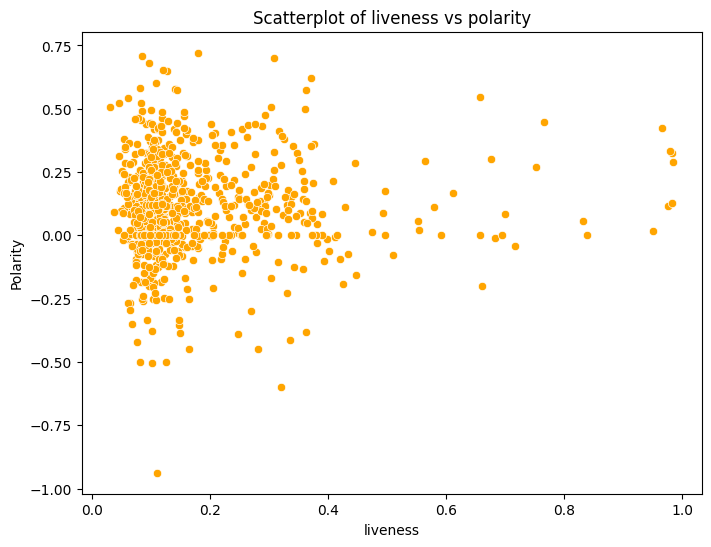

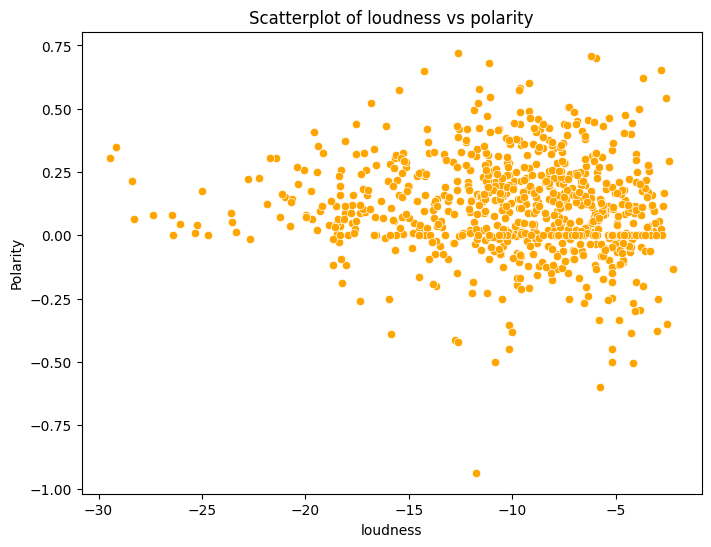

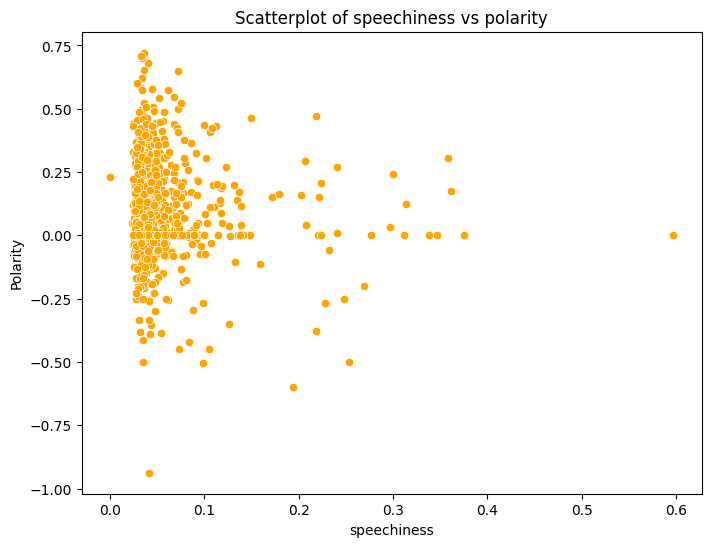

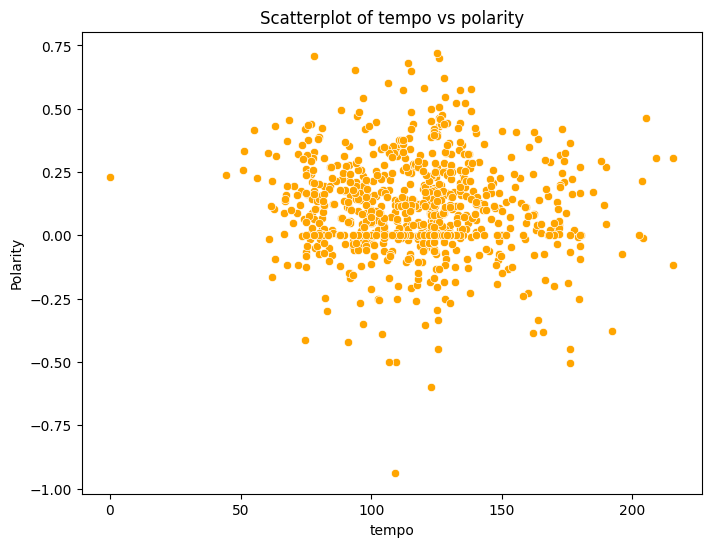

In [122]:
#Use float predictors 
predictors = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

for predictor in predictors:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=predictor, y="Polarity", data=data, color='orange')
    plt.title(f"Scatterplot of {predictor} vs polarity")
    plt.xlabel(predictor)
    plt.ylabel("Polarity")
    plt.show()


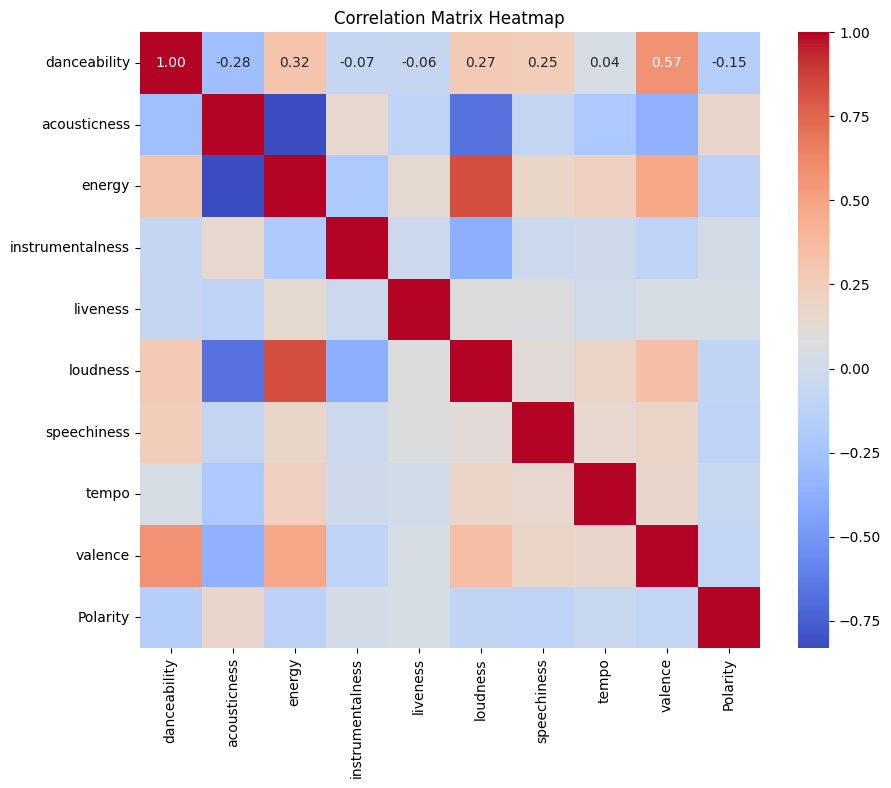

In [97]:
# Create a heatmap
#changed popularity with Polarity
correlation_matrix = data[predictors + ["Polarity"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

                  danceability  acousticness    energy  instrumentalness  \
danceability          1.000000     -0.279860  0.319763         -0.071417   
acousticness         -0.279860      1.000000 -0.832011          0.150834   
energy                0.319763     -0.832011  1.000000         -0.193524   
instrumentalness     -0.071417      0.150834 -0.193524          1.000000   
liveness             -0.064976     -0.105824  0.143590         -0.030442   
loudness              0.274111     -0.672272  0.833370         -0.367775   
speechiness           0.250180     -0.079954  0.177546         -0.029229   
tempo                 0.040936     -0.205497  0.228663         -0.014182   
valence               0.572814     -0.358774  0.474365         -0.108618   
Polarity             -0.154875      0.172581 -0.129477          0.018817   

                  liveness  loudness  speechiness     tempo   valence  \
danceability     -0.064976  0.274111     0.250180  0.040936  0.572814   
acousticness     

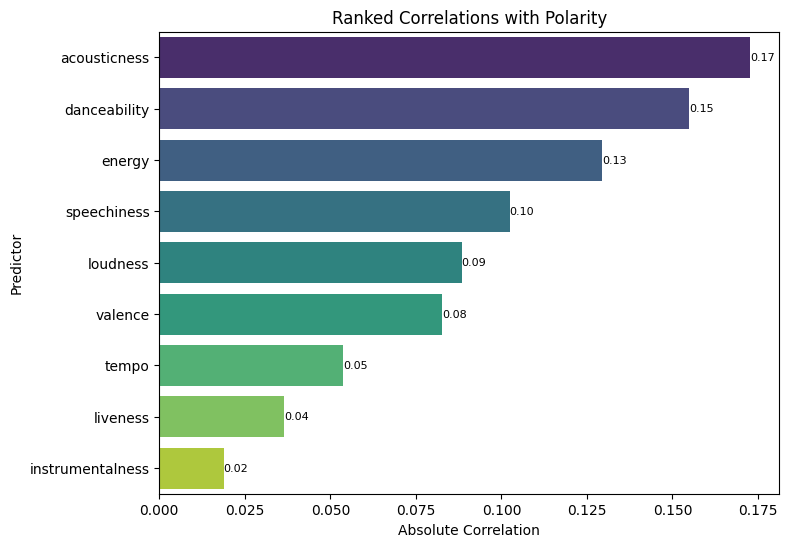

In [98]:
# Create a correlation matrix
correlation_matrix = data[predictors + ["Polarity"]].corr()

print(correlation_matrix)
# Extract and rank the correlations with 'popularity'
correlations_with_popularity = correlation_matrix["Polarity"].drop("Polarity")
ranked_correlations = correlations_with_popularity.abs().sort_values(ascending=False)

# Create a bar plot to visualize the ranked correlations
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=ranked_correlations.values, y=ranked_correlations.index, palette="viridis")
plt.title("Ranked Correlations with Polarity")
plt.xlabel("Absolute Correlation")
plt.ylabel("Predictor")

# Annotate the bars with the correlation values
for i, val in enumerate(ranked_correlations):
    barplot.text(val, i, f'{val:.2f}', va='center', color='black', fontsize=8)

plt.show()


Text(0.5, 1.0, 'Distribution of Polarity')

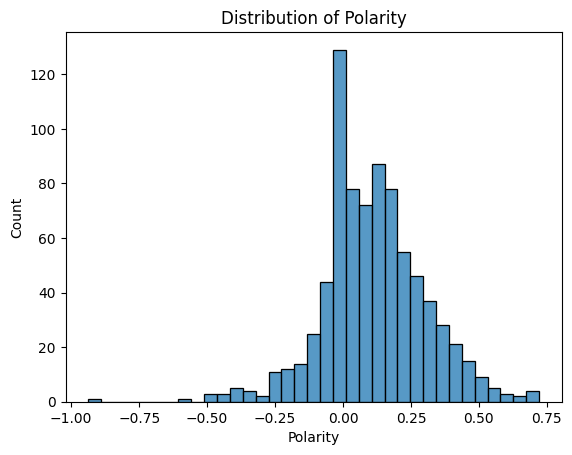

In [99]:
sns.histplot(x = data['Polarity'])
plt.title("Distribution of Polarity")

count    794.000000
mean       0.109932
std        0.191023
min       -0.937500
25%        0.000000
50%        0.100000
75%        0.222619
max        0.721429
Name: Polarity, dtype: float64


<Axes: xlabel='Polarity'>

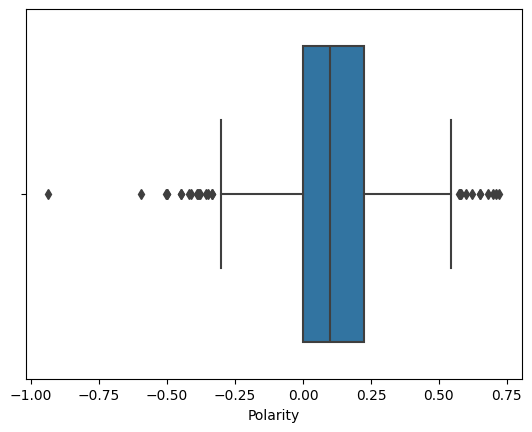

In [100]:
pop_summary = data['Polarity'].describe()
print(pop_summary)

sns.boxplot(x = data['Polarity'])

In [101]:
#Find multicollinearity

predictors = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = data[predictors]  # Select your predictors

vif = pd.DataFrame()
vif["Predictor"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif
#VIF over 5 or 10 means that it is multicollinear. I chose 10 for this case

,Predictor,VIF
0,danceability,16.696275
1,acousticness,5.957221
2,energy,12.695128
3,instrumentalness,1.352925
4,liveness,2.606161
5,loudness,10.495902
6,speechiness,2.421635
7,tempo,15.378465
8,valence,7.931302


In [76]:
#Use LASSO to reduce multicollinearity
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

predictors = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = data[predictors]
y = data['Polarity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha= 0.01)  # alpha can be adjusted
lasso.fit(X_train_scaled, y_train)

lasso_coefficients = lasso.coef_
print("Lasso Coefficients:", lasso_coefficients)

y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


#MSE1: 0.0357



Lasso Coefficients: [-0.01650012  0.02432527 -0.          0.          0.00220125 -0.
 -0.00524878 -0.          0.        ]
Mean Squared Error: 0.03336871757970125


In [102]:
#Drop danceability
predictors = ['acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness','valence']
X = data[predictors]  # Select your predictors

vif = pd.DataFrame()
vif["Predictor"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Predictor,VIF
0,acousticness,5.415071
1,energy,6.043598
2,instrumentalness,1.345355
3,liveness,2.583023
4,loudness,7.904358
5,speechiness,2.342922
6,valence,6.123284


In [105]:
data.drop(columns=["time_signature", "valence", "language", "mode", "explicit", "disc"], inplace=True)

In [128]:
data.to_excel("/Users/chiaralu/Downloads/clean_songs_en_fr_sp.xlsx", index=False)

,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,Polarity,Subjectivity
count,7.940000e+02,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,2.293024e+05,42.059194,0.551335,0.467712,0.492840,0.088557,0.172651,-9.996762,0.055507,117.720000,0.109932,0.509443
std,8.710649e+04,32.484708,0.163184,0.368641,0.270125,0.227547,0.140378,5.007118,0.050760,29.456016,0.191023,0.188291
min,7.940000e+04,0.000000,0.000000,0.000008,0.006770,0.000000,0.030500,-29.456000,0.000000,0.000000,-0.937500,0.000000
25%,1.780982e+05,0.000000,0.443500,0.076625,0.259500,0.000000,0.097325,-12.647000,0.032600,96.480500,0.000000,0.446863
50%,2.108465e+05,50.000000,0.556000,0.477500,0.480500,0.000086,0.119000,-9.176500,0.039650,118.868000,0.100000,0.535535
75%,2.574398e+05,71.000000,0.670750,0.843750,0.739500,0.012375,0.194750,-6.157000,0.056300,133.502250,0.222619,0.611111
max,1.121253e+06,97.000000,0.951000,0.995000,0.980000,0.948000,0.985000,-2.211000,0.597000,215.679000,0.721429,1.000000
